In [1]:
import os

import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

## Get Data

In [4]:
path_to_data = "/Users/dkhosla/.bokeh/data/"

df_stocks = pd.read_csv(f"{path_to_data}/stocks.csv")
df_gpm_pop = pd.read_csv(f"{path_to_data}/gapminder_population.csv")
df_gpm_lxp = pd.read_csv(f"{path_to_data}/gapminder_life_expectancy.csv")

## The most basic Chart

- Super quick to make

''

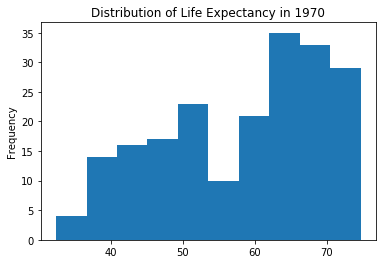

In [5]:
df_gpm_lxp['1970'].plot.hist(title='Distribution of Life Expectancy in 1970')
;

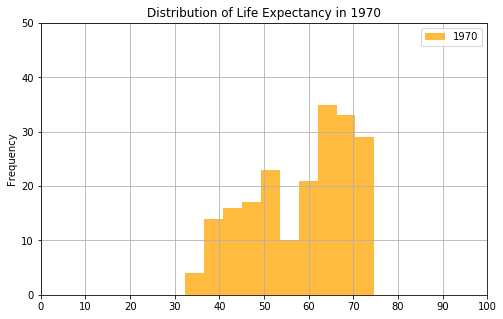

In [6]:
def make_simple_histogram():
    """
    """
    ax = \
    (df_gpm_lxp
     .loc[:, '1970']
     .plot
     .hist(
         title='Distribution of Life Expectancy in 1970', 
         color='orange', 
         alpha=0.75, 
         grid=True, 
         legend=True, 
         xlim=(0, 100), 
         figsize=(8, 5), 
         fontsize=10, 
         xticks=range(0, 101, 10), 
         yticks=range(0, 51, 10))
    )
    return ax

make_simple_histogram()

## Does not look very professional. Let's try to clean it up.

- This is because we're using the `classic` style

In [7]:
import seaborn as sns

''

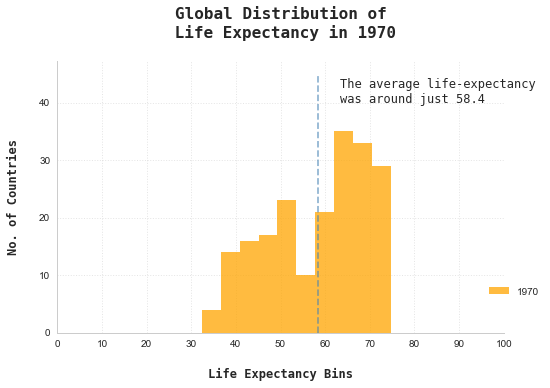

In [8]:
sns.set_style("whitegrid")
# try: plt.style.available

sns.set_context("notebook")
# try: poster, talk

# make the plot
ax = make_simple_histogram()

# remove extra spines
sns.despine(ax=ax)

# make the grid lighter
ax.grid(True, linestyle=":", alpha=0.5)

font_title = {
    'size': 16, 
    'weight': 'bold', 
    'name': 'monospace'
}

font_axes = {
    'size': 12, 
    'weight': 'bold', 
    'name': 'monospace'
}

# add a label to the axes
ax.set_title("Global Distribution of\n Life Expectancy in 1970\n", fontdict=font_title)
ax.set_xlabel("\nLife Expectancy Bins", fontdict=font_axes)
ax.set_ylabel("No. of Countries\n", fontdict=font_axes)

# move the legend outside
if ax.get_legend():
    ax.legend(bbox_to_anchor=(1.1, 0.2))
    
avg_life_expectancy = df_gpm_lxp['1970'].mean().round(1)    
    
# add a vertical line
ax.vlines(x=avg_life_expectancy, 
          ymin=0, 
          ymax=45, 
          color='steelblue', 
          linestyle='dashed', 
          alpha=0.6)
    
# annotate
ax.text(x=avg_life_expectancy + 5,
        y=40, 
        s=f"The average life-expectancy\nwas around just {avg_life_expectancy}" ,
        fontdict={'name': 'monospace', 'size': 12})
;

### Let's keep the useful bits in a function for re-use

In [9]:
def format_plot(ax):
    """
    """
    sns.set_style("whitegrid")
    
    font_title = {
        'size': 16, 
        'weight': 'bold', 
        'name': 'monospace'
    }

    font_axes = {
        'size': 14, 
        'weight': 'bold', 
        'name': 'monospace'
    }

    ax.grid(True, linestyle=":", alpha=0.6)
    sns.despine(ax=ax)

    if ax.get_legend():
        ax.legend(bbox_to_anchor=(1.1, 1))
    
    ax.set_title(f"\n\n{ax.get_title()}\n", fontdict=font_title)
    ax.set_xlabel(f"\n{ax.get_xlabel()} ➞", fontdict=font_axes)
    ax.set_ylabel(f"{ax.get_ylabel()} ➞\n", fontdict=font_axes)

---
# Part 2: IPython Widgets

- IPython Widgets
- See: https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

## 2a. Standalone Widgets

In [10]:
from ipywidgets import Dropdown, IntSlider, FloatSlider, ToggleButtons, SelectMultiple

### Dropdown

In [11]:
fruits = Dropdown(value='apples', 
                  description='Pick one:',
                  options=['apples', 'grapes', 'bananas', 'oranges'])
fruits

Dropdown(description='Pick one:', options=('apples', 'grapes', 'bananas', 'oranges'), value='apples')

In [12]:
print(f"You selected {fruits.value}")

You selected apples


### Slider

In [13]:
ages = IntSlider(description="Age: ",
                     value=30, 
                     min=20, 
                     max=50, 
                     step=1)
ages

IntSlider(value=30, description='Age: ', max=50, min=20)

In [14]:
print(f"You selected {ages.value}")

You selected 30


### Toggle

In [15]:
rsvp = ToggleButtons(value='Maybe', options=['No', 'Yes', 'Maybe'], description='Call me:')
rsvp

ToggleButtons(description='Call me:', index=2, options=('No', 'Yes', 'Maybe'), value='Maybe')

In [16]:
print(f"You selected {rsvp.value}")

You selected Maybe


### Select

In [17]:
lunch = SelectMultiple(description='Lunch order', options=['spaghetti', 'lasagna', 'pasta', 'salad', 'calzone', 'wine'])
lunch

SelectMultiple(description='Lunch order', options=('spaghetti', 'lasagna', 'pasta', 'salad', 'calzone', 'wine'…

In [18]:
print(f"You selected {lunch.value}")

You selected ()


## 2b. Interactive!


In [19]:
from ipywidgets import interactive

In [20]:
interactive?

Init signature: interactive(*args, **kwargs)
Docstring:     
A VBox container containing a group of interactive widgets tied to a
function.

Parameters
----------
__interact_f : function
    The function to which the interactive widgets are tied. The `**kwargs`
    should match the function signature.
__options : dict
    A dict of options. Currently, the only supported keys are
    ``"manual"`` and ``"manual_name"``.
**kwargs : various, optional
    An interactive widget is created for each keyword argument that is a
    valid widget abbreviation.

Note that the first two parameters intentionally start with a double
underscore to avoid being mixed up with keyword arguments passed by
``**kwargs``.
Init docstring: Public constructor
File:           ~/miniconda3/envs/iqoslp/lib/python3.6/site-packages/ipywidgets/widgets/interaction.py
Type:           MetaHasTraits


### Example 1: Life Expectancy

- Here, the lambda function receives the value of year from the widget, filters the data to retain relevant rows and plots the histogram
- The Dropdown widget just passes the selected value to the lambda

In [21]:
interactive(
    lambda year: format_plot(df_gpm_lxp
                             .loc[:, year]
                             .plot
                             .hist(bins=20, 
                                   xlim=(0, 100), 
                                   title=f"Global Life Expectancy in {year}", 
                                   figsize=(8, 5))), 
    year=Dropdown(
        description='Select Year',
        value='1970',
        options=df_gpm_lxp.columns.tolist()[1:]
    )
)

interactive(children=(Dropdown(description='Select Year', index=6, options=('1964', '1965', '1966', '1967', '1…

**Example 2: Stocks**

In [22]:
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])

def f(companies):
    ax = \
    pd.concat([
        (df_stocks
         .query(f"Company == '{company}'")
         .set_index("Date")
         .loc[:, 'Adj Close']
         .pipe(Series, name=company)
         .resample('M')
         .mean()
        ) for company in companies
    ], axis=1).plot(title=f'Comparing {[i.upper() for i in companies]}', figsize=(15, 7))
    ax.set_ylabel("Value at Close")
    format_plot(ax)


interactive(f,
            companies=SelectMultiple(description="Pick companies to compare",
                           value=['AAPL', 'IBM'],
                           options=df_stocks.Company.unique().tolist())
           )

interactive(children=(SelectMultiple(description='Pick companies to compare', index=(0, 3), options=('AAPL', '…

## 2c. Animation

In [23]:
from ipywidgets import Play

In [24]:
Play?

Init signature: Play(*args, **kwargs)
Docstring:     
Play/repeat buttons to step through values automatically, and optionally loop.
    
Init docstring: Public constructor
File:           ~/miniconda3/envs/iqoslp/lib/python3.6/site-packages/ipywidgets/widgets/widget_int.py
Type:           MetaHasTraits


In [25]:
play = Play(
    interval=100,
    value=1965,
    min=1965,
    max=2010,
    step=1,
    description="Press play",
    disabled=False
)

interactive_plot = \
interactive(
    lambda year: format_plot(df_gpm_lxp
                             .loc[:, str(year)]
                             .plot
                             .hist(bins=20, 
                                   xlim=(0, 100), 
                                   ylim=(0, 50),
                                   title=f"Global Life Expectancy in {year}", 
                                   figsize=(8, 5))), 
    year=play)

output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

interactive(children=(Play(value=1965, description='Press play', max=2010, min=1965), Output(layout=Layout(hei…

- Not a smooth animation, but great for prototyping without additional tools
- Libraries like `bqplot` help animate things better

---
## 2d. Listening for changes

Widgets have 
- attributes (called *traits*) like `value`
- methods like `observe` which require a handler function and a trait to control

Here's an example where we link the value trait of two simple widgets:

In [1]:
from ipywidgets import IntSlider, HTML, HBox, VBox

In [2]:
slider = IntSlider(value=25)
text = HTML(f"The slider's current value is {slider.value}")

In [3]:
def update_html(change):
    text.value = f"The slider's current value is {slider.value}"
    
slider.observe(handler=update_html, names='value')    

VBox([slider, text])

---
## Changing figure values

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

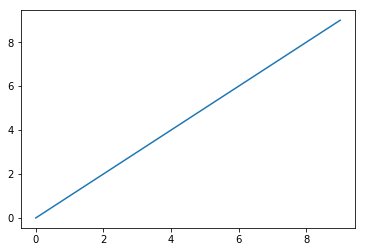

In [11]:
fig, ax = plt.subplots()